Alessandro Beccani 931651
# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 11</span>


### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

def printPerformance(history, score, x_valid, y_target, y_pred, x_label, y_label,
                     title):
  plt.figure(figsize=(10,5))
  # Plot training & validation loss values
  plt.subplot(121)
  plt.suptitle('Model Loss and Prediction' + title)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.subplot(122)
  # Plot predictions
  plt.plot(x_valid, y_target, label='True')
  plt.scatter(x_valid, y_pred, color='r', label='Predicted')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.tight_layout()
  plt.show()
  print()

In [ ]:
def lineFitNN(m, b, n_points, sigma, n_epochs, plot_title):
    # generate training data
    x_train = np.random.uniform(-1, 1, n_points)
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function
    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)
    # compose the NN model
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    # fit the model using training dataset
    # over 10 epochs of 32 batch size each
    # report training progress against validation data
    history = model.fit(x=x_train, y=y_train,
             batch_size=32, epochs=n_epochs,
             shuffle=True, # a good idea is to shuffle input before at each epoch
             validation_data=(x_valid, y_valid),
             verbose=0)

    # return weights and biases
    model.get_weights()

    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

    # print performance
    y_pred = model.predict(x_valid, verbose=0)
    printPerformance(history, score, x_valid, y_target, y_pred, 'x', 'y',
                    plot_title)

To explore different combinations of training data size, epochs, and Gaussian noise, I varied three values for both the data size: $N{points} = 50, 500, 2000$  and the number of epochs: $N{epochs} = 3, 10, 30$, and toggled the noise between $0$ and $0.5$, resulting in a total of $3\times3\times2 = 18$ configurations.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


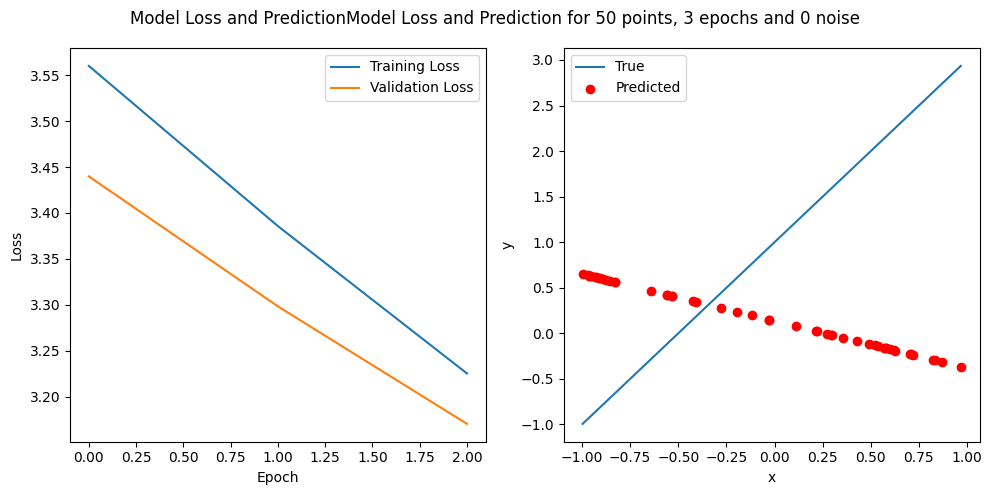

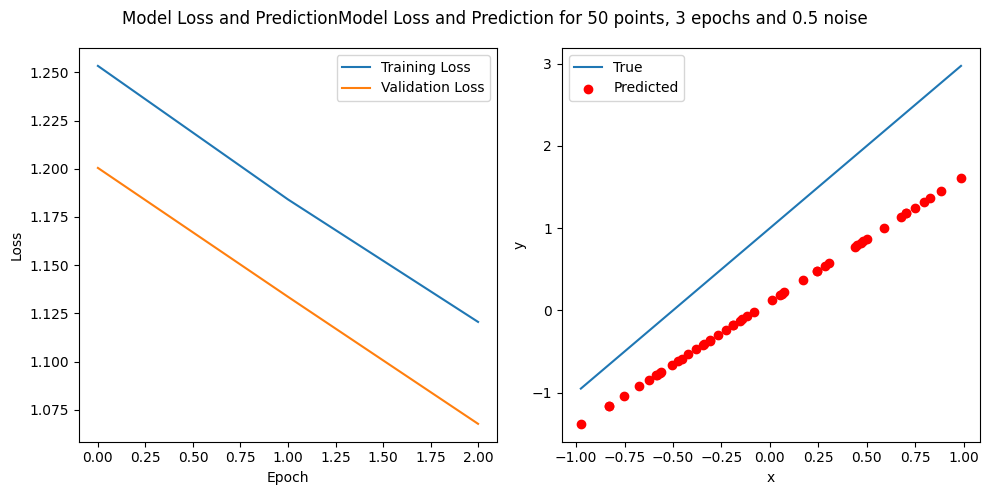

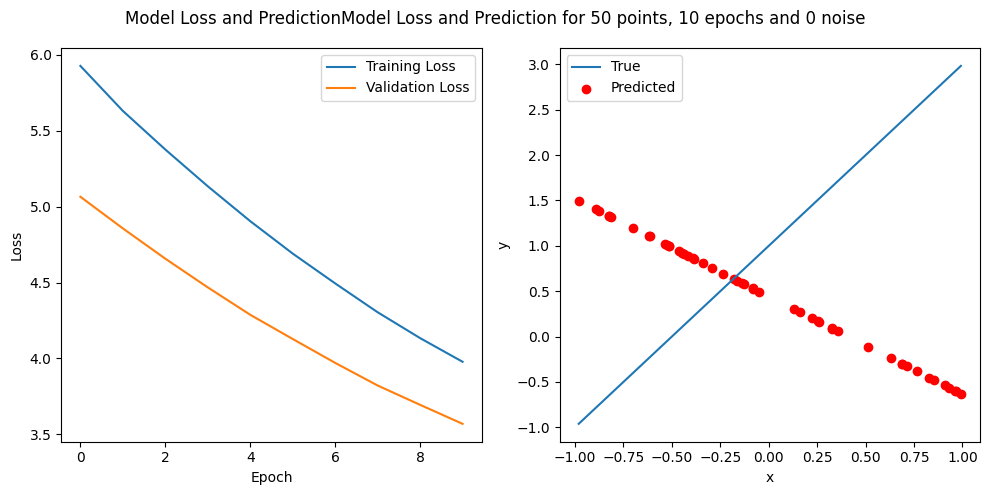

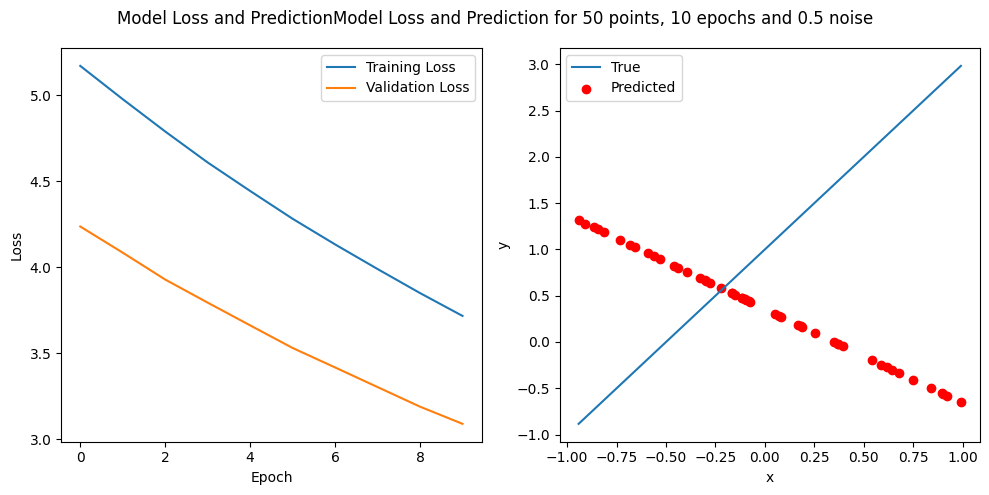

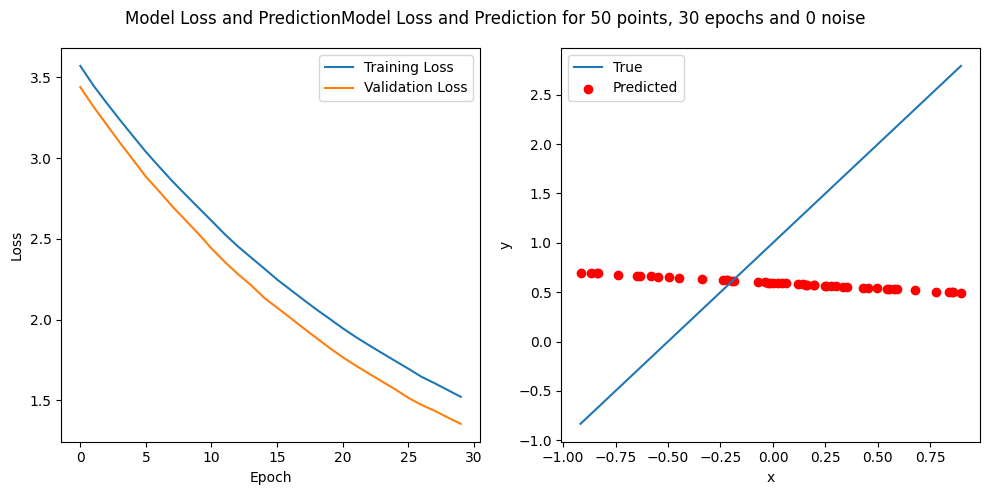

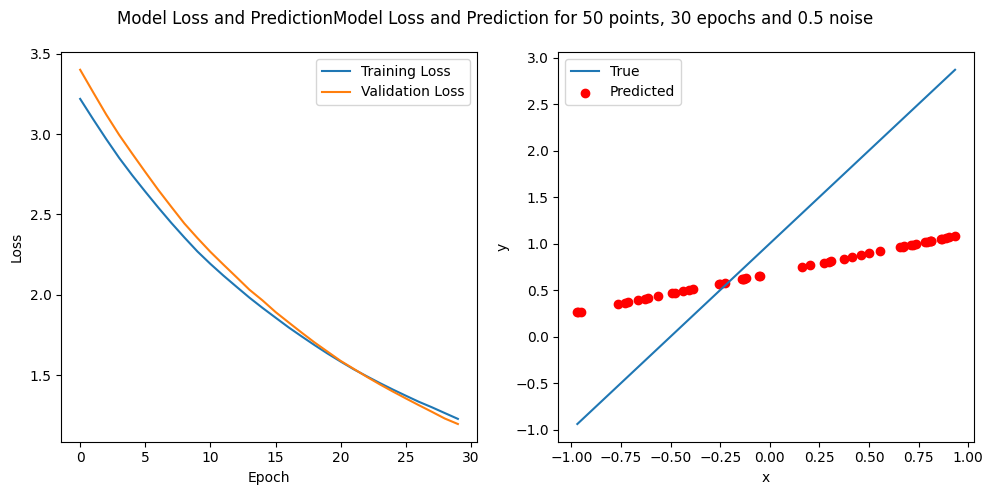

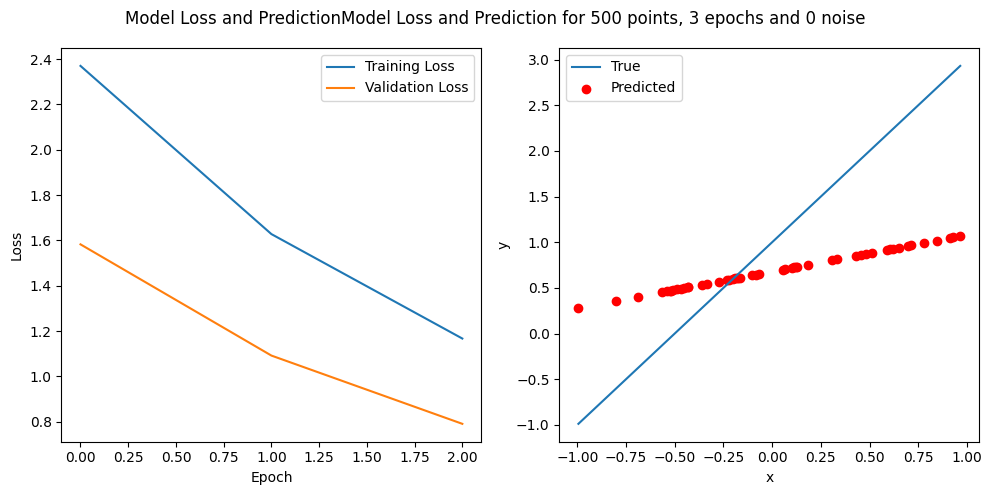

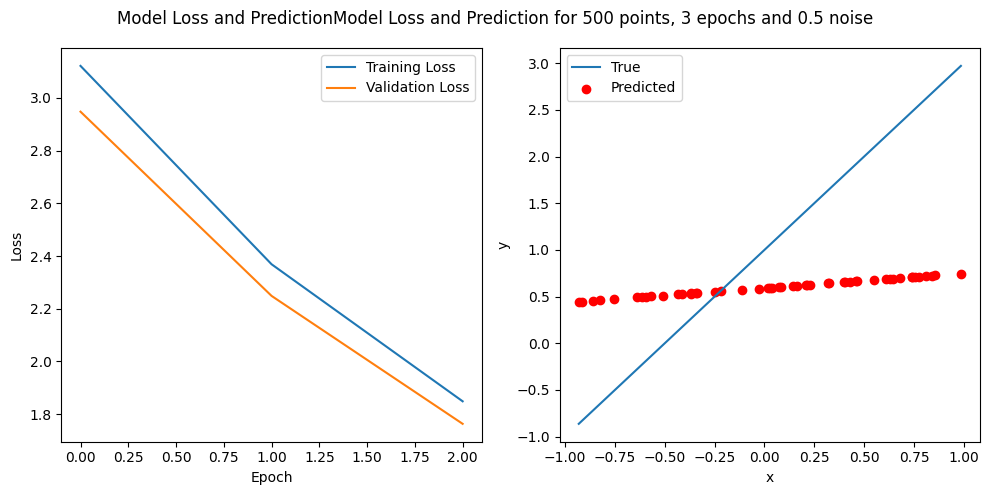

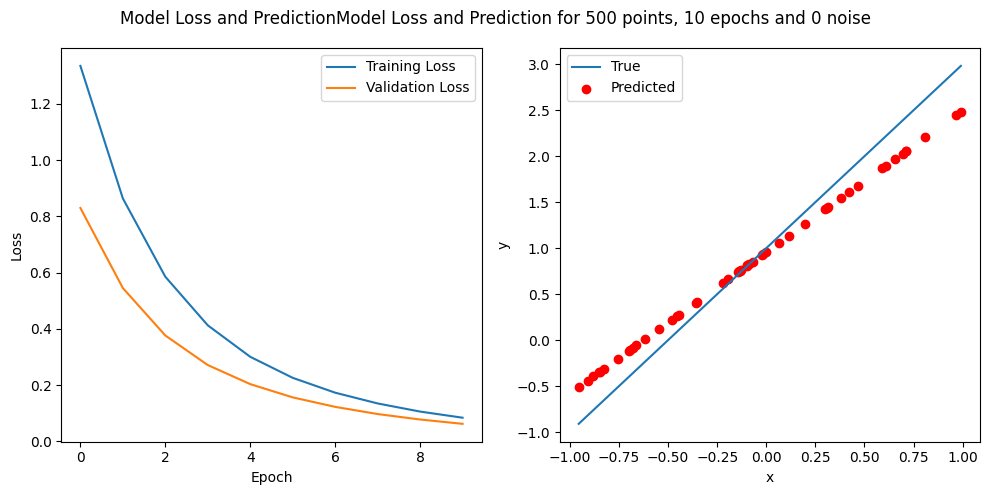

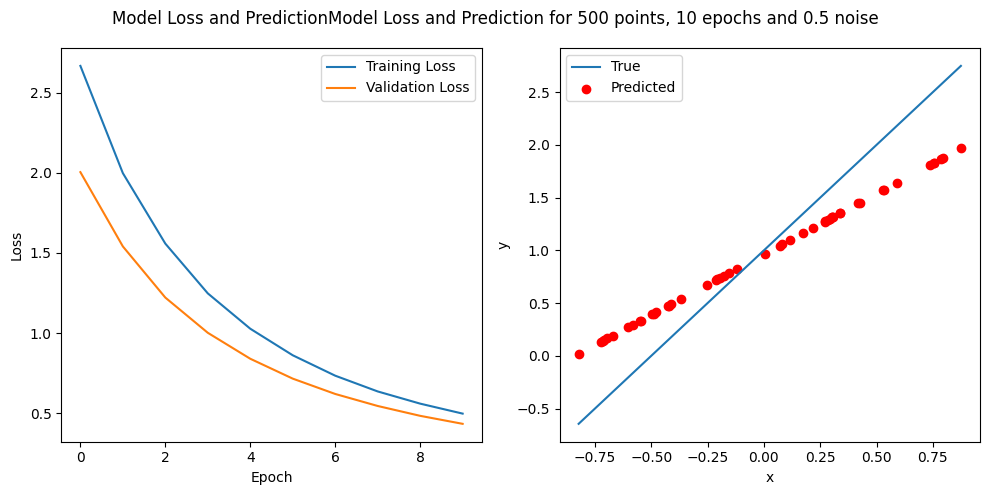

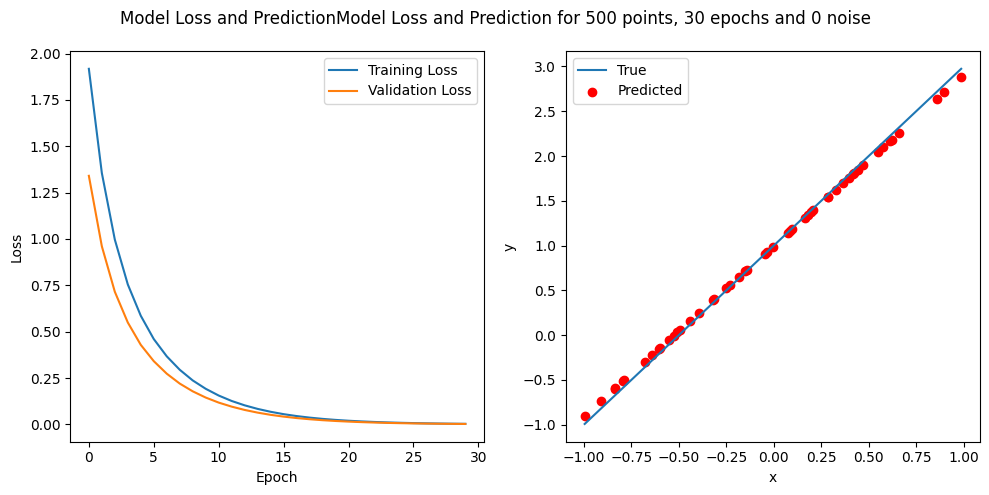

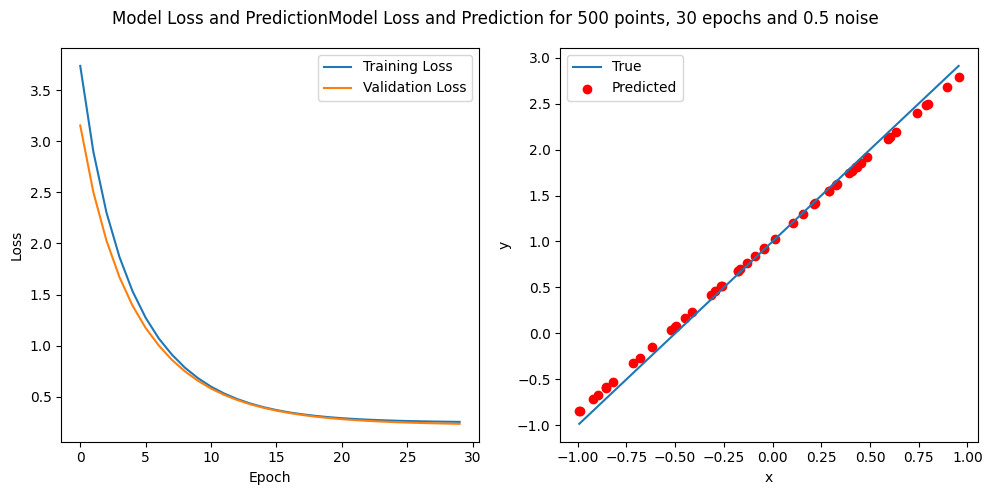

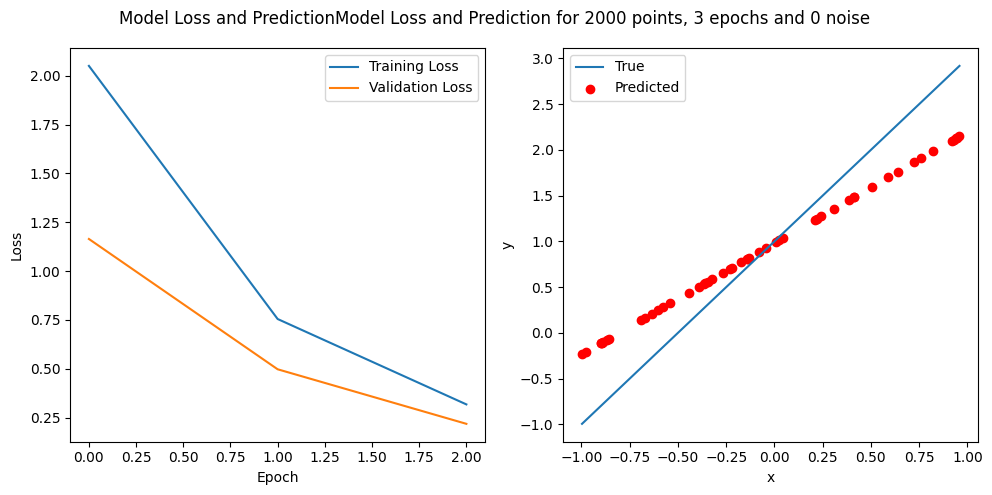

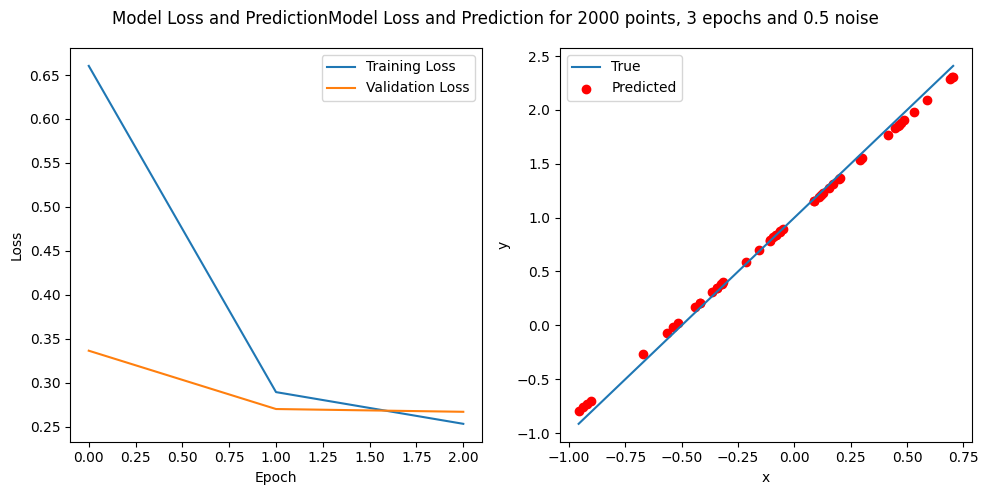

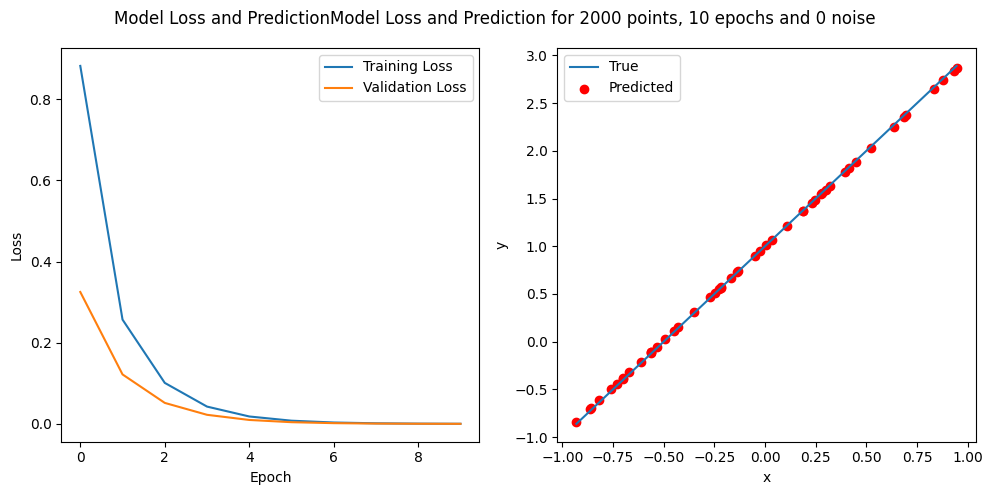

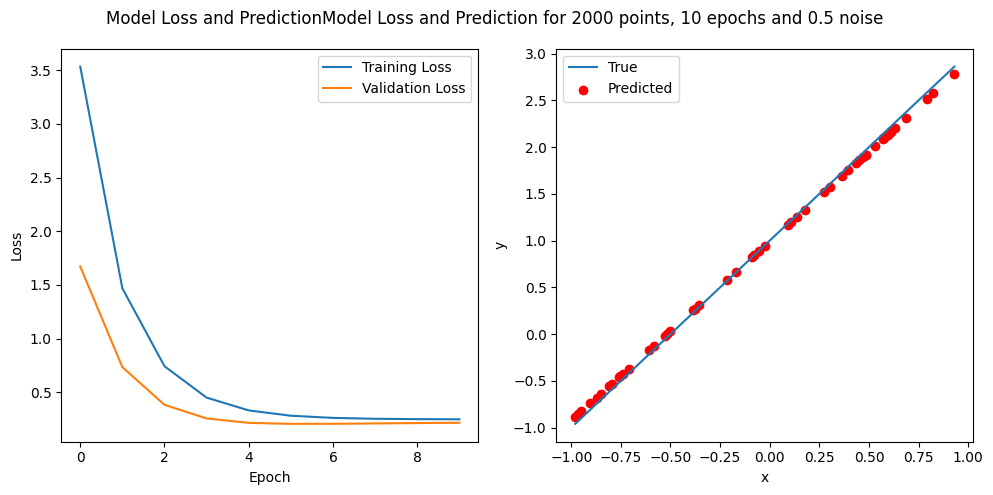

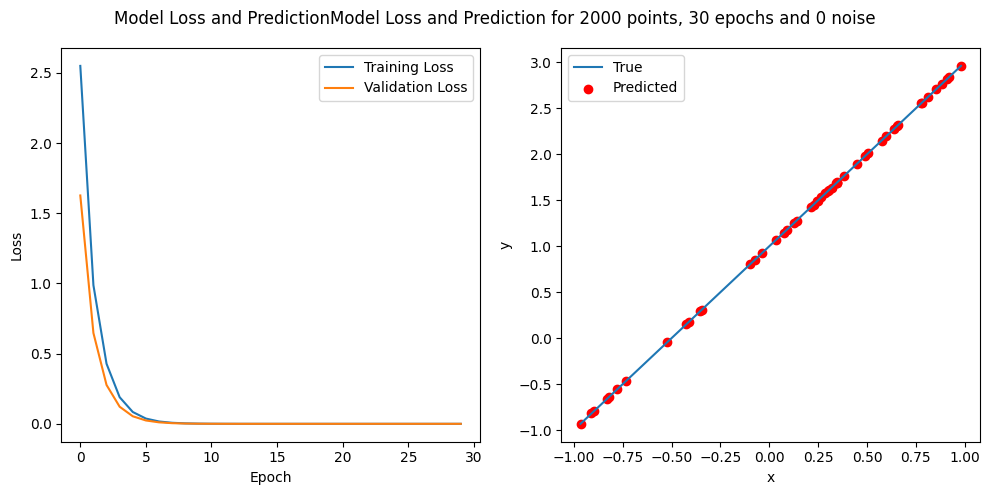

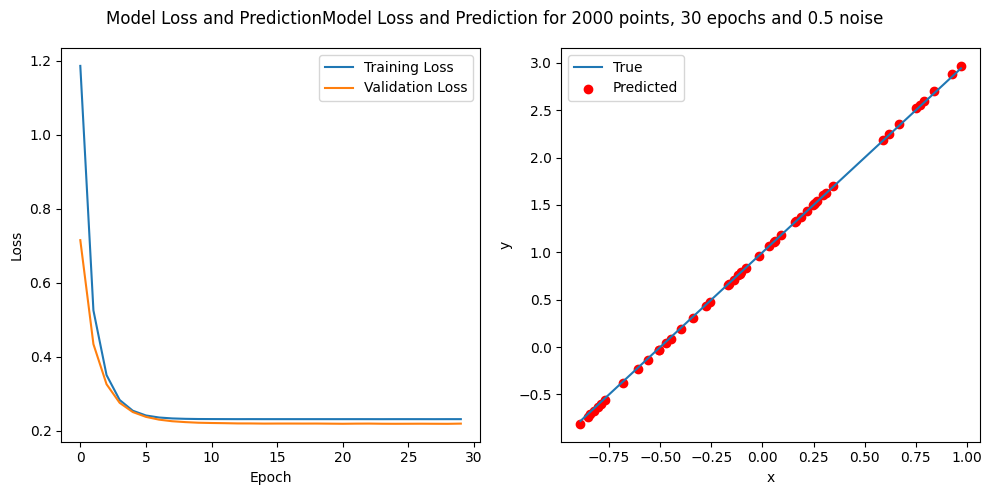

In [ ]:

m = 2
b = 1
# start NN
#1:
n_epochs = [3, 10, 30]
n_points = [50, 500, 2000]
sigma = [0, 0.5]
for N in n_points:
    for ep in n_epochs:
        for s in sigma:
          plot_title = f"Model Loss and Prediction for {N} points, {ep} epochs and {s} noise"
          lineFitNN(m, b, N, s, ep, plot_title)

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set?
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

First I try different combinations for the number of layers and the number of neurons
per layer. The following values are combined for a total of 12 configurations:

- nodes = 16, 32, 64
- hidden layers = 1, 3, 6, 10

In [ ]:
def epoly(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

def polyFitNN(n_points, sigma, n_epochs,nodes, layers, opt, act, f_loss, met, plot_title):
    x_train = np.random.uniform(-1, 1, n_points)
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_target = epoly(x_valid)
    y_train = np.random.normal(epoly(x_train), sigma)
    y_valid = np.random.normal(epoly(x_valid), sigma)

   # Compose the NN model
    model = tf.keras.Sequential()
    # Add the first layer (input layer with input_shape)
    model.add(Dense(nodes, activation=act, input_shape=(1,)))
    # Add hidden layers
    for i in range(layers):
        model.add(Dense(nodes, activation=act))

    # Add the output layer (no activation for regression)
    model.add(Dense(1))
    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer=opt, loss=f_loss, metrics=[met])
    #fit the model
    history = model.fit(x=x_train, y=y_train,
             batch_size=32, epochs=n_epochs,
             shuffle=True, validation_data=(x_valid, y_valid),
             verbose = 0)
    # return weights and biases
    model.get_weights()
    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    # print performance
    y_pred = model.predict(x_valid, verbose = 0)
    printPerformance(history, score, x_valid, y_target, y_pred,'x', 'y', plot_title)

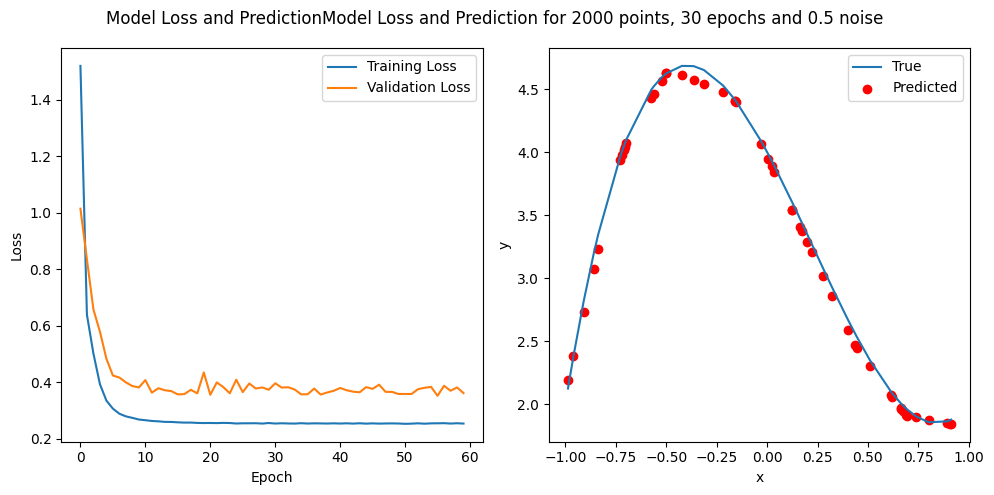

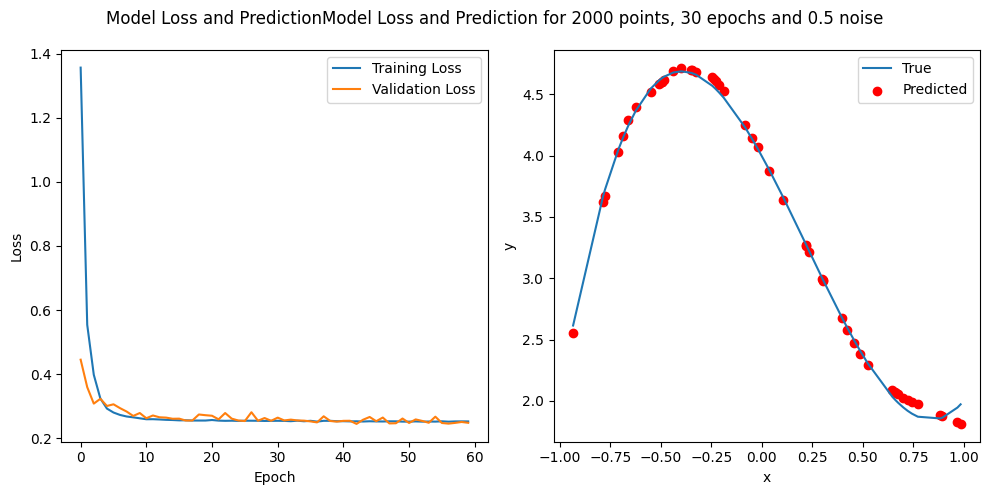

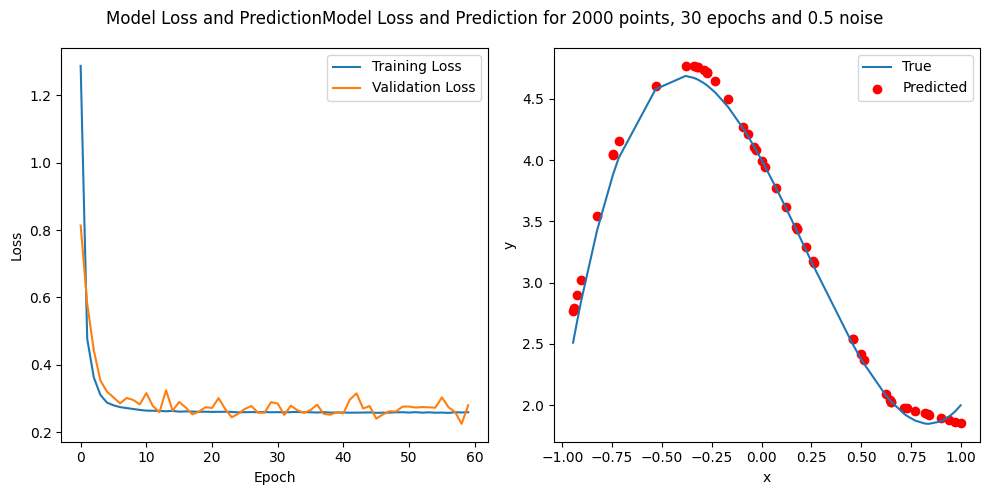

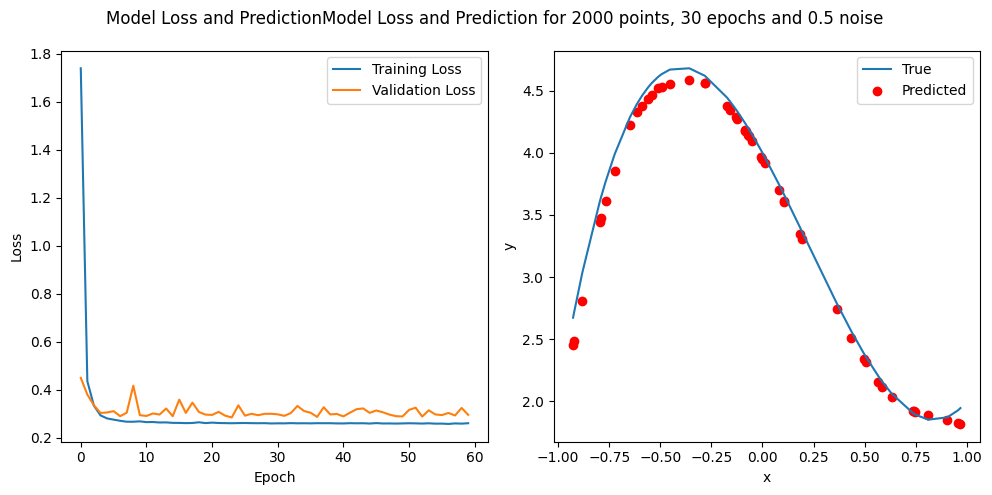

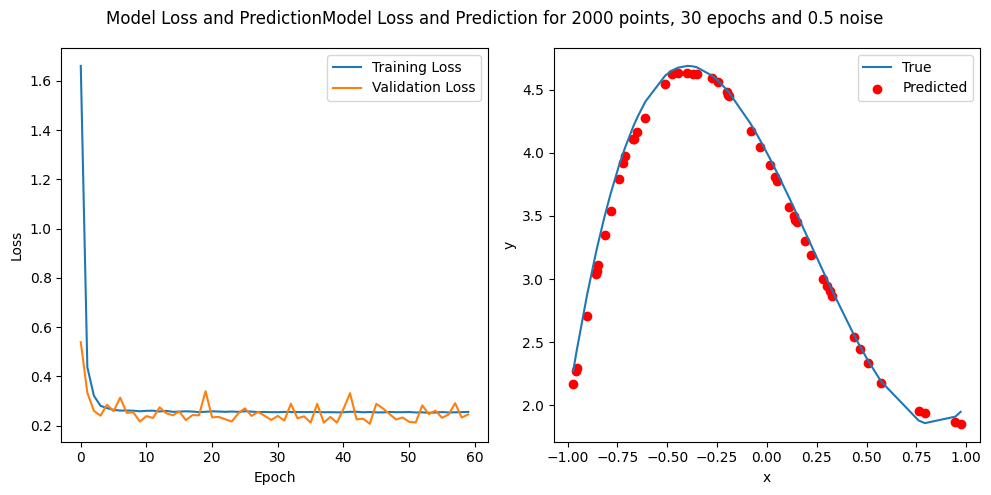

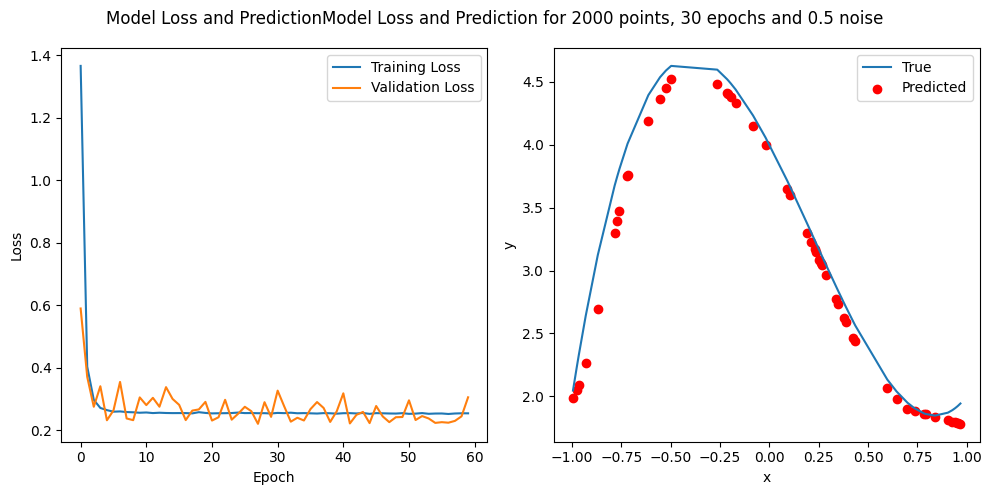

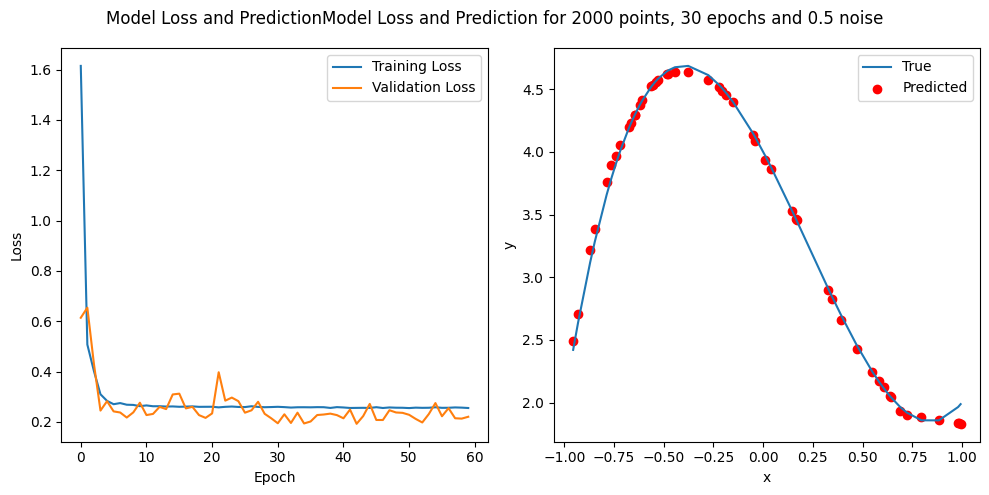

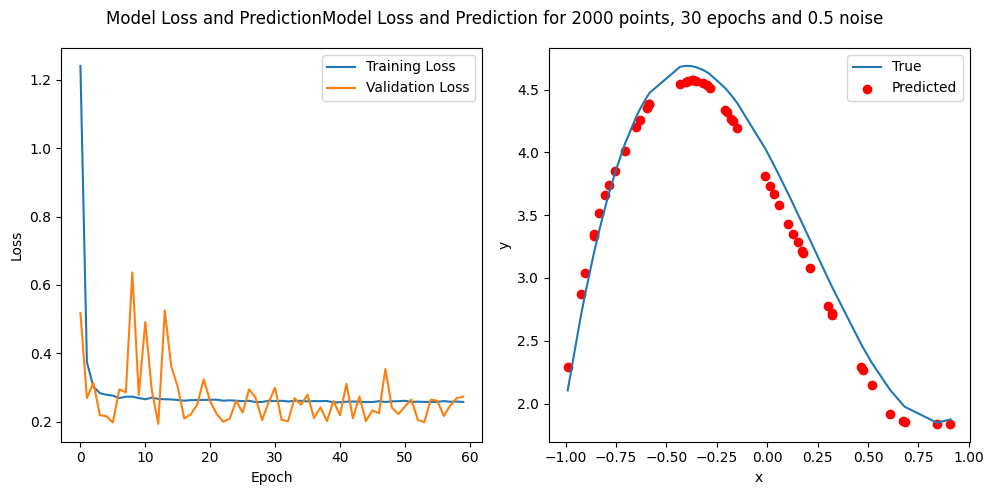

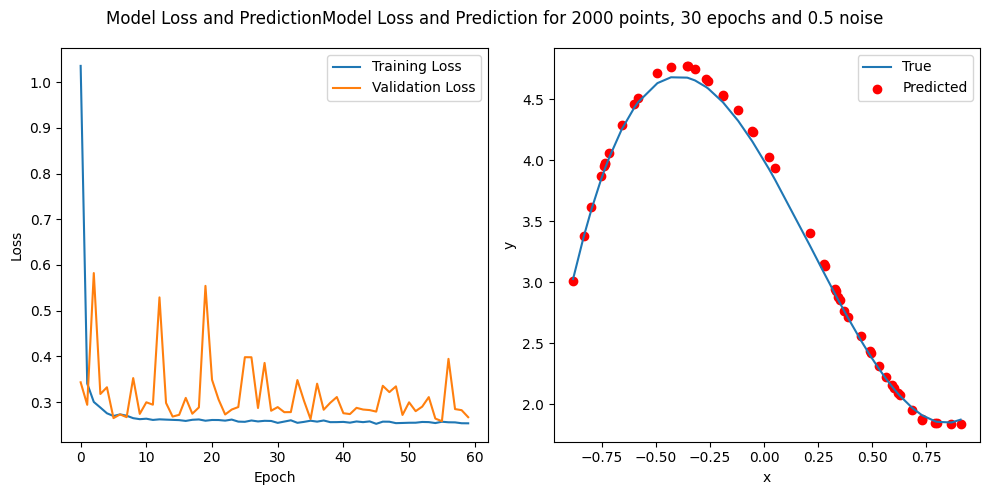

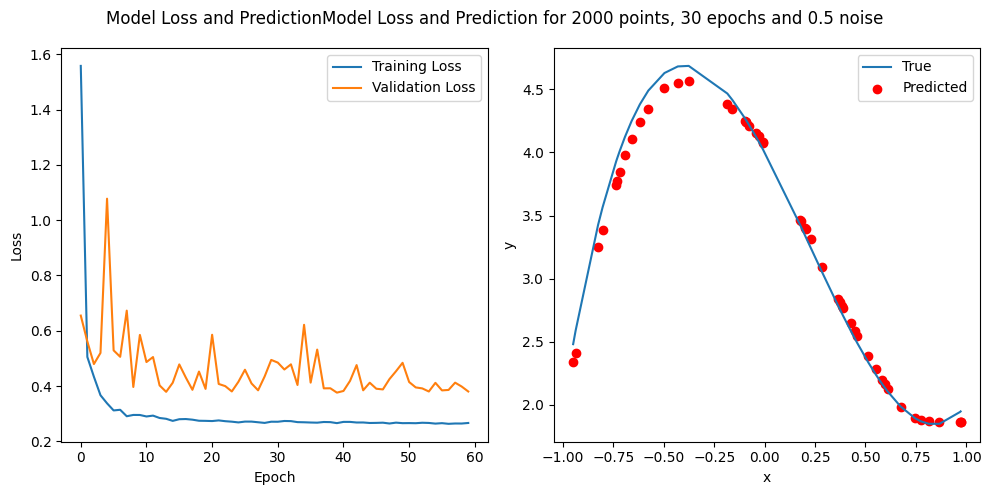

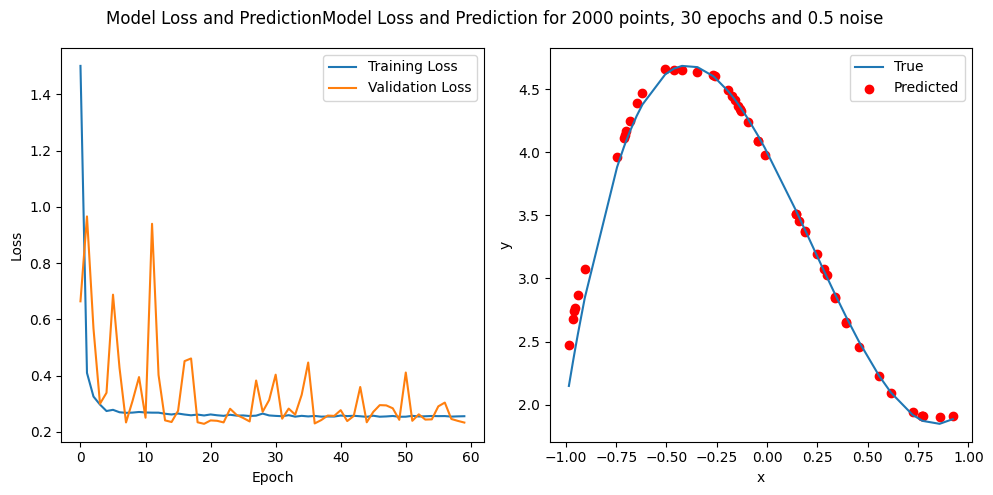

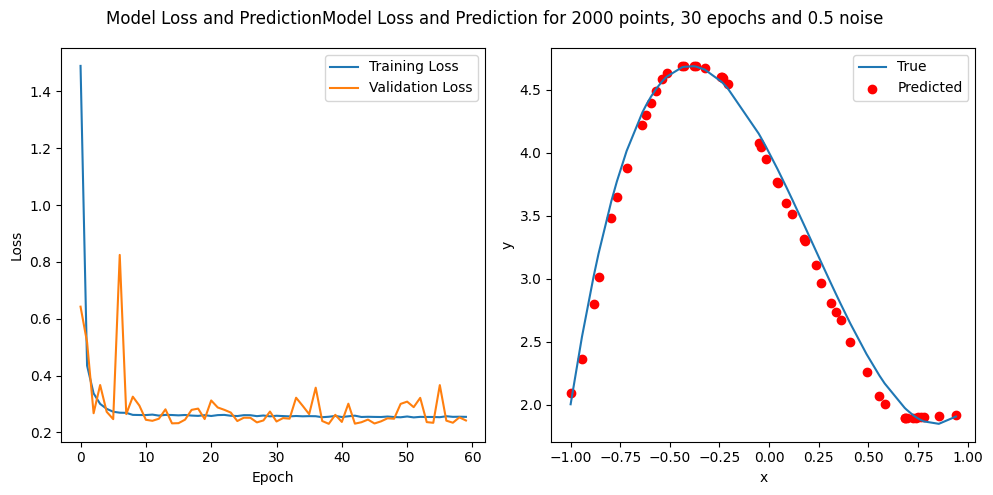

In [ ]:
n_points = 5000
sigma = 0.5
n_epochs = 60
# model param
opt = 'sgd'
act = 'relu'
f_loss = 'mse'
met = 'mse'
nodes = [16, 32, 64]
hidden_layers = [1, 3, 6, 10]
# start NN
for layers in hidden_layers:
    for node in nodes:
        title = f"Model Loss and Prediction for {node} nodes, and {layers} hidden layers"
        polyFitNN(n_points, sigma, n_epochs, node, layers, opt, act, f_loss, met, plot_title)

From now on we fix nodes = 64 and hidden layers = 10. We explore two different optimizers: Adam and rmsprop; two different activation functions: sigmoid and tanh; two different loss functions: mae, binary_crossentropy. For a total of $2^3 = 8$ configurations

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


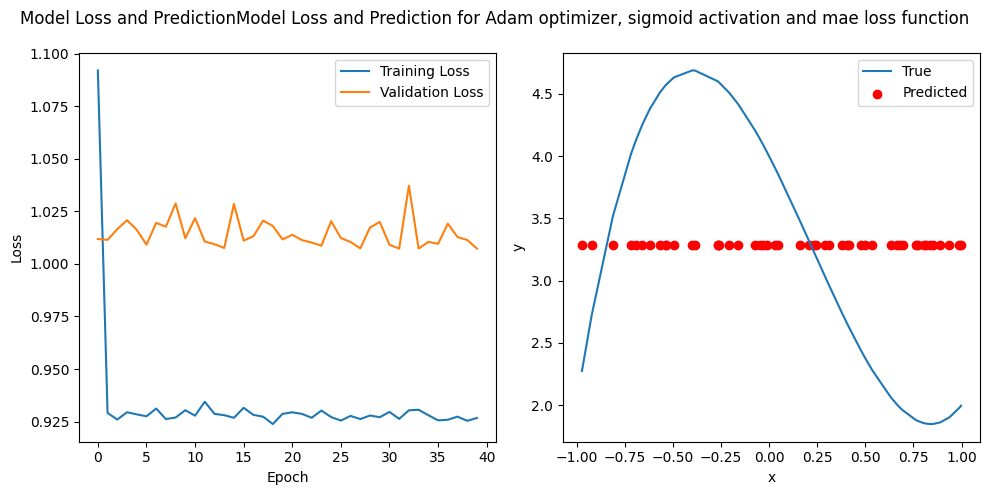

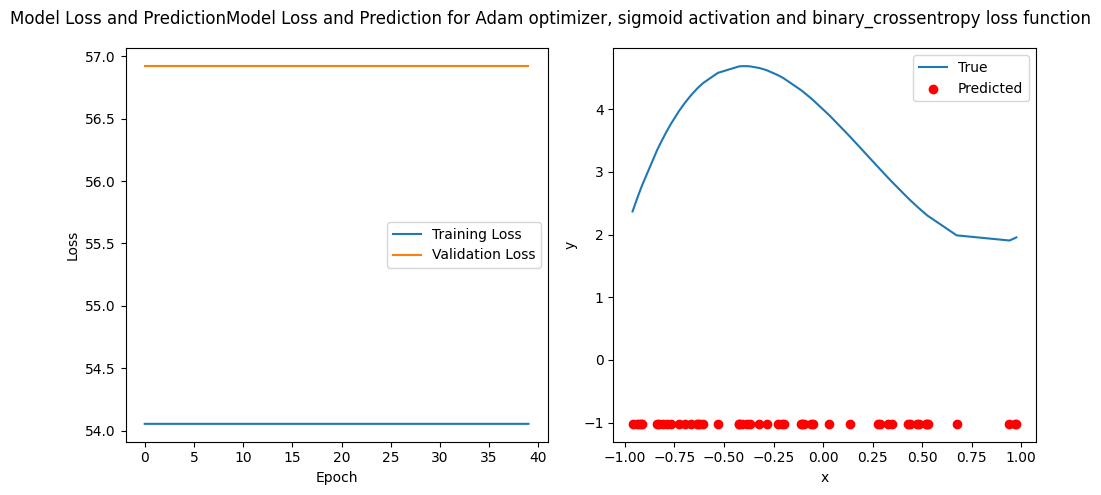

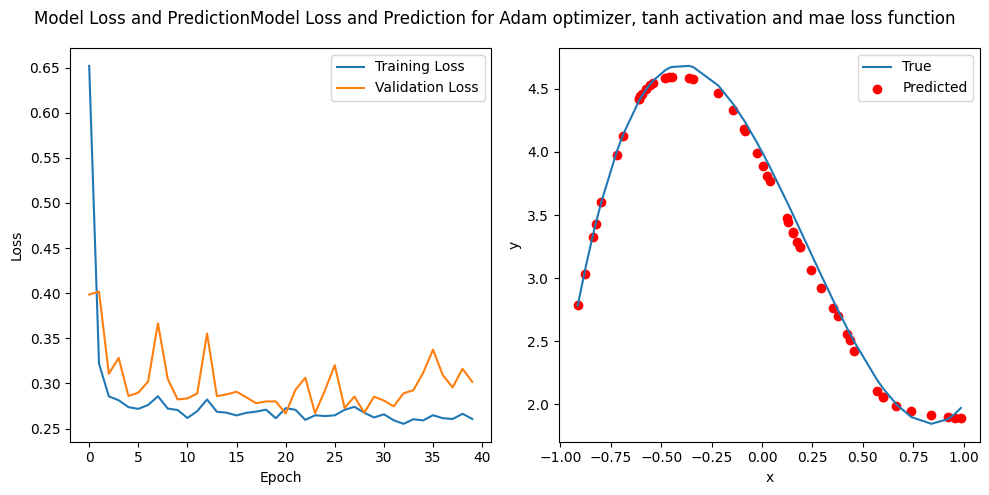

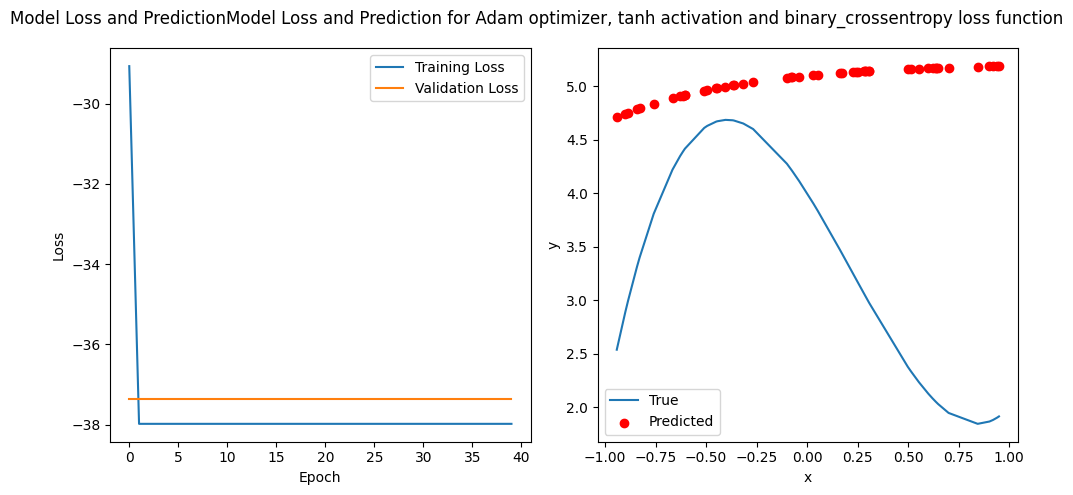

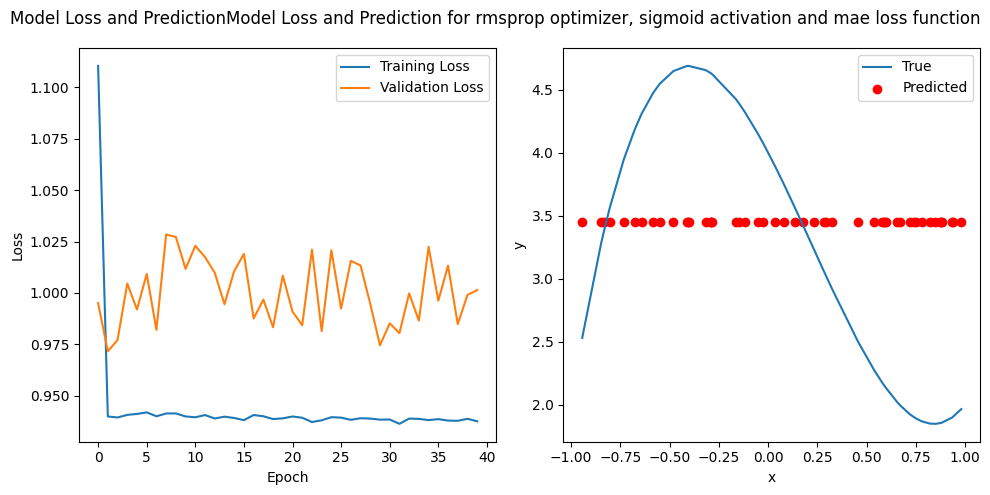

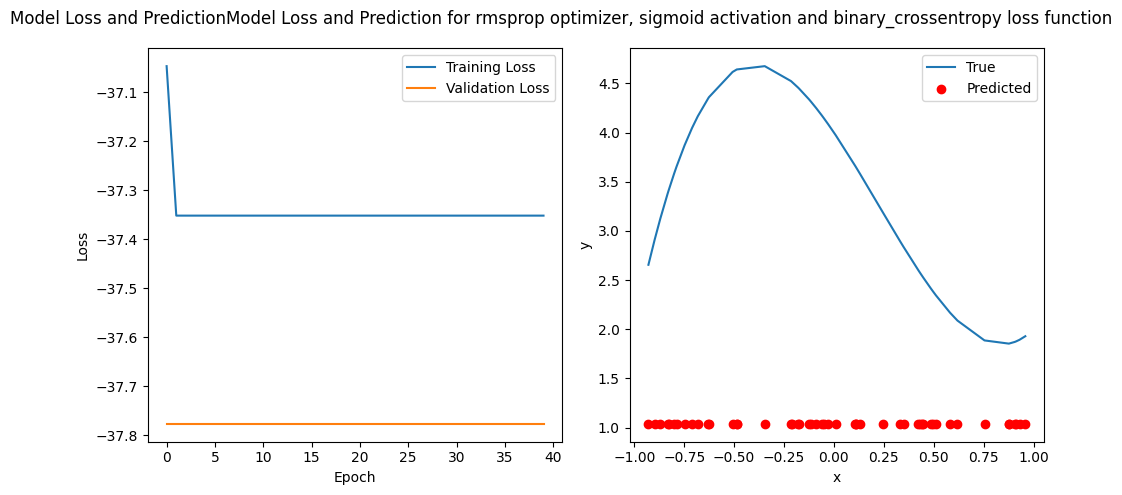

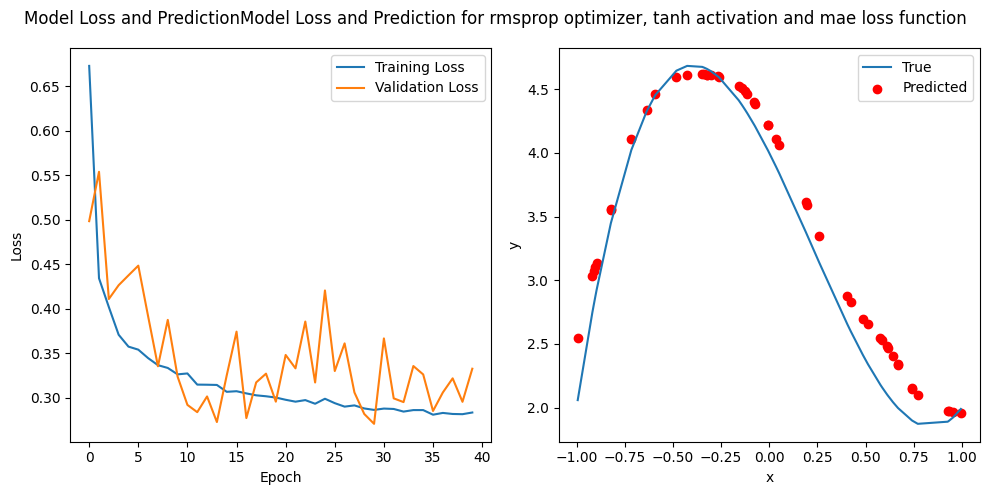

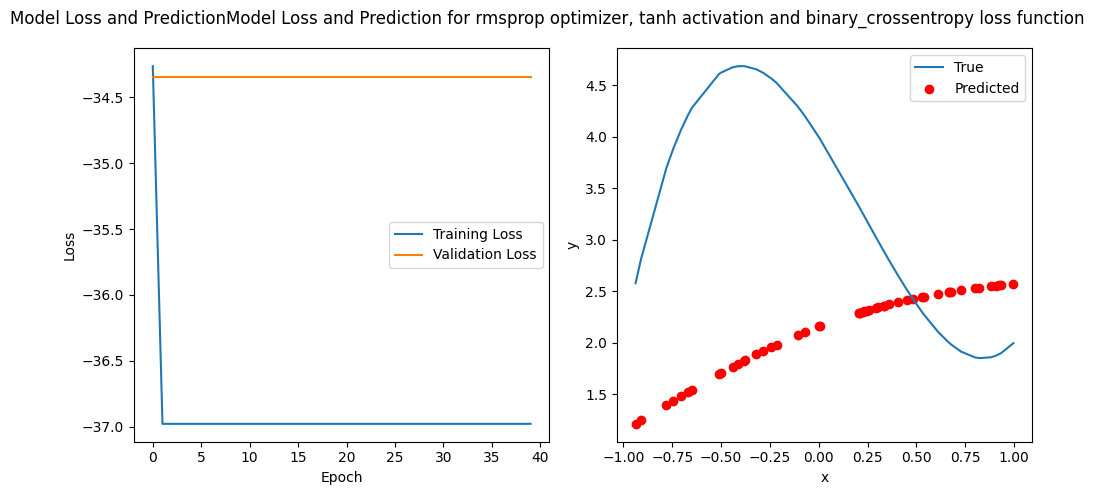

In [ ]:
n_points = 4000
sigma = 0.3
n_epochs = 40
# model param
optimizers = ['Adam', 'rmsprop']
activations = ['sigmoid', 'tanh']
loss_func = ['mae', 'binary_crossentropy']
met = 'mse'
nodes = 64
hidden_layers = 10
# start NN
for opt in optimizers:
    for act in activations:
        for f_loss in loss_func:
          title = f"Model Loss and Prediction for {opt} optimizer, {act} activation and {f_loss} loss function"
          polyFitNN(n_points, sigma, n_epochs, node, layers, opt, act, f_loss, met, title)

We finally test the model out of its comfort zone, in an interval it was not trained on.

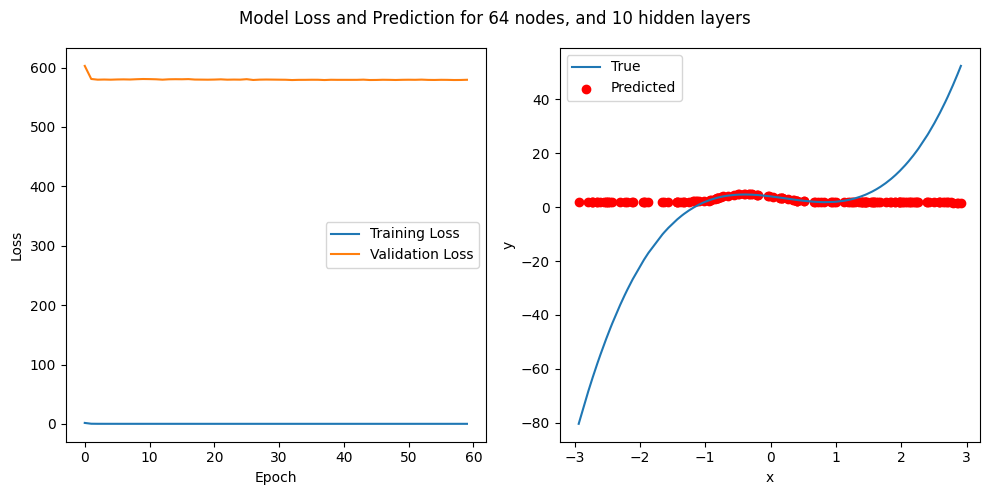

In [ ]:
def polyFitNN(n_points, sigma, n_epochs,nodes, layers, opt, act, f_loss, met):
    x_train = np.random.uniform(-1, 1, n_points)
    x_valid = np.random.uniform(-3, 3, 150)
    x_valid.sort()
    y_target = epoly(x_valid)
    y_train = np.random.normal(epoly(x_train), sigma)
    y_valid = np.random.normal(epoly(x_valid), sigma)

   # Compose the NN model
    model = tf.keras.Sequential()
    # Add the first layer (input layer with input_shape)
    model.add(Dense(nodes, activation=act, input_shape=(1,)))
    # Add hidden layers
    for i in range(layers):
        model.add(Dense(nodes, activation=act))

    # Add the output layer (no activation for regression)
    model.add(Dense(1))
    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer=opt, loss=f_loss, metrics=[met])
    #fit the model
    history = model.fit(x=x_train, y=y_train,
             batch_size=32, epochs=n_epochs,
             shuffle=True, validation_data=(x_valid, y_valid),
             verbose = 0)
    # return weights and biases
    model.get_weights()
    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    # print performance
    y_pred = model.predict(x_valid, verbose = 0)
    title = " for " + str(nodes) + " nodes, and " + str(layers) + " hidden layers"
    printPerformance(history, score, x_valid, y_target, y_pred,'x', 'y', title)

n_points = 5000
sigma = 0.5
n_epochs = 60
# model param
opt = 'sgd'
act = 'relu'
f_loss = 'mse'
met = 'mse'
nodes = 64
hidden_layers = 10
# start NN
polyFitNN(n_points, sigma, n_epochs, node, layers, opt, act, f_loss, met)

The model is not able to fit the function outside of its training interval.

### Exercise 11.3
  
To extend the model to fit the function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$, I used 3 hidden layers of 64 neurons.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


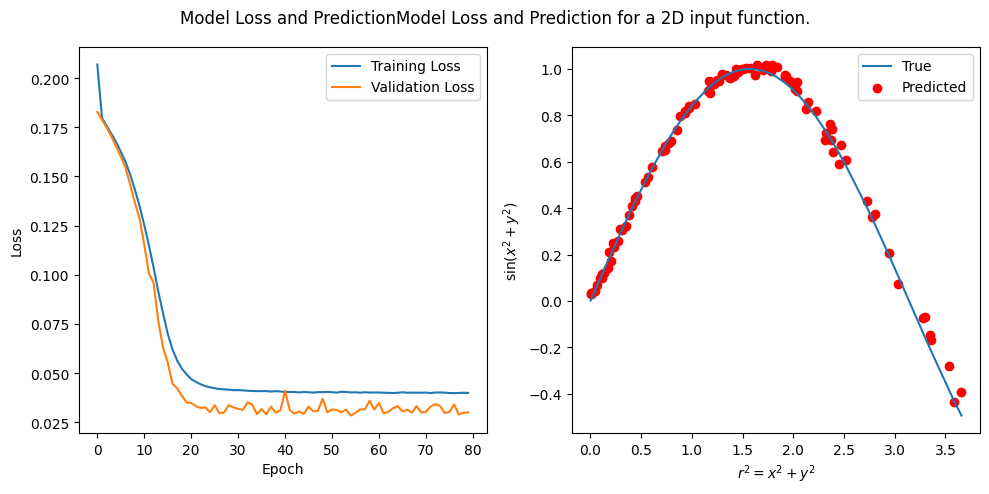

In [4]:

def powsin(x):
    return np.sin(x[:, 0]**2 + x[:, 1]**2)

def powSinFitNN(n_points, sigma, int_range, n_epochs, nodes, opt, act, f_loss, met, plot_title):

  x_train = np.random.uniform(-int_range, int_range, (n_points, 2))
  x_valid = np.random.uniform(-int_range, int_range, (100, 2))

  z_train = np.random.normal(powsin(x_train), sigma)
  z_valid = np.random.normal(powsin(x_valid), sigma)
  # Compose the NN model
  model = tf.keras.Sequential([
    Dense(nodes, activation=act, input_shape=(2,)),
    Dense(nodes, activation=act),
    Dense(nodes, activation=act),
    Dense(nodes, activation=act),
    Dense(nodes, activation=act),
    Dense(1)
  ])

  # Compile the model choosing optimizer, loss and metrics objects
  model.compile(optimizer=opt, loss=f_loss, metrics=[met])

  # Fit the model
  history = model.fit(x=x_train, y=z_train,
                    batch_size=32, epochs=n_epochs,
                    shuffle=True, validation_data=(x_valid, z_valid),
                    verbose=0)

  # Evaluate model
  score = model.evaluate(x_valid, z_valid, batch_size=32, verbose=0)
  # Predict z values for the validation input
  z_pred = model.predict(x_valid)
	#plot points
  r_plot = x_valid[:,0]**2 + x_valid[:,1]**2
  #sorting data
  ordering_matrix = np.column_stack((r_plot, z_pred));
  ordering_matrix = ordering_matrix[ordering_matrix[:, 0].argsort()]
  r_plot = ordering_matrix[:,0]
  z_pred = ordering_matrix[:,1]
  z_target = np.sin(r_plot)
  printPerformance(history, score, r_plot, z_target, z_pred,r'$r^2 = x^2 + y^2$', r'$\sin(x^2 + y^2)$', plot_title)

n_points = 5000
sigma = 0.2
n_epochs = 80
nodes = 64
int_range = 3/2

# Model parameters
opt = 'sgd'
act = 'relu'
f_loss = 'mse'
met = 'mse'
title = r"Model Loss and Prediction for a 2D input function."
powSinFitNN(n_points, sigma, int_range, n_epochs, nodes, opt, act, f_loss, met, title)